<a href="https://colab.research.google.com/github/JonasSouza871/Machine-Learning-Statistics-Studies/blob/main/Projeto_Tipos_de_Regressao_Custos_Medicos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Tratamento de dados

--------

- Realizar um estudo comparativo de quatro tipos de regress˜ao (linear, polinomial, lo-
gar´ıtmica e exponencial) aplicados a um dataset de seguros de sa´ude, avaliando qual
modelo apresenta melhor desempenho na predi¸c˜ao de custos.

- Dataset : Medical Cost Personal Datasets. [Link Aqui](https://www.kaggle.com/datasets/mirichoi0218/insurance)

- Nesse dataset tem os dados de varios clientes de plano de saude e os gastos de cada um.

In [1]:
import pandas as pd
import numpy as np

In [3]:
dados = pd.read_csv('insurance.csv')
dados

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


- dados como sexo, e se é fumante necessitam serem transformados em dados 0 e 1 para analise estatítisca completa.

In [5]:
dados['sex'] = dados['sex'].map({'female': 0, 'male': 1}) #Onde tiver feminino recebe o valor de 0 e onde tiver masculino o valor de 1
dados['smoker'] = dados['smoker'].map({'yes': 1, 'no': 0}) # onde for fumante recebe o valor de 1 e onde não for fumante recebe o valor 0 de 0

- Como ficará SEXO:

Feminino -> 0

Masculino -> 1



- Como ficará FUMANTE:

Sim -> 1

Não -> 0

In [8]:
dados['sex'].head()

,sex
0,0
1,1
2,1
3,1
4,1


In [9]:
dados['smoker'].head()

,smoker
0,1
1,0
2,0
3,0
4,0


- o proximo tratamento de dados necessário será a analise de regioes os quais foram obtidas cada dados e transformar em dados numericos

In [10]:
print(dados['region'].unique())

['southwest' 'southeast' 'northwest' 'northeast']


- Acima, foram as regiões encontradas, abaixo a tabela que pretendo implementar para substituir os nomes por números.

southwest -> 0

southeast -> 1

northwest -> 2

northeast -> 3


In [11]:
dados['region'] = dados['region'].map({
    'southwest': 0,
    'southeast': 1,
    'northwest': 2,
    'northeast': 3
})


In [12]:
dados['region'].head()

,region
0,0
1,1
2,1
3,2
4,2


- Agora colocando uma variável para cada coluna:

In [ ]:
# variáveis dependentes
idades = dados['age']
sexo = dados['sex']
indice_massa_corporal = dados['bmi']
criancas = dados['children']
fumante = dados['smoker']
regiao = dados['region']


#variaveis independentes
custos= dados['charges']

-> Escolhidos para serem analisados nesse projeto:  Se  BMI e se é fumante ou nao e como os custos funcionam

-> dividir o dataset em treino e teste. Sendo os de treino usados nos treinamentos do modelo e os de testes usados para previsão

In [31]:
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf

treino, teste = train_test_split(dados, test_size=0.2, random_state=42) #divide os dados em 80% de dados de treino e 20% para testes

print(treino.shape) # tamnho dos dados de treino
print(teste.shape)  # tammanho dos dados de teste


(1070, 7)
(268, 7)


#  2. Análise via Regressão Linear

---------

## 2.1. Análise bmi x custos

------------------

In [44]:
import statsmodels.formula.api as smf #biblioteca para usar os modelos de regressao
import statsmodels.stats.api as sms

In [76]:

regressao = smf.ols(formula='charges ~ bmi', data=treino).fit() #Ajusta os parametros nos dados de treino
# charges (custos) sendo a variavel dependente e o bmi(indice corporal) sendo a independente
# primeiro termo -> variavel dependente
# segundo termo -> variavel independente

# avalia no conjunto de teste
previsao_custo = regressao.predict(teste) # prever os valores de custo apartir dos dados de teste
print(previsao_custo)

764     11232.663072
887     13134.018128
890     11903.729562
1293    11456.351902
259     13879.647562
            ...     
109     15123.671407
575     12015.573977
535     12351.107223
543     19958.489631
846     14774.402883
Length: 268, dtype: float64


f(x) = ax +b --> Modelo regressão linear

In [77]:
print(regressao.summary()) #mostra os resultados

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     43.27
Date:                Mon, 29 Sep 2025   Prob (F-statistic):           7.47e-11
Time:                        14:01:02   Log-Likelihood:                -11548.
No. Observations:                1070   AIC:                         2.310e+04
Df Residuals:                    1068   BIC:                         2.311e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1353.0731   1858.569      0.728      0.4

- A análsie do r^2 permite afirmar que a Apenas 3,9% da variação nos custos é explicada pelo  Bmi, 96,1% da variação NÃO está sendo capturada pelo modelo

In [78]:
regressao.params

,0
Intercept,1353.073072
bmi,392.436544


- Modelo de após o treinamento para idade:

f(X) = 392* x + 1353

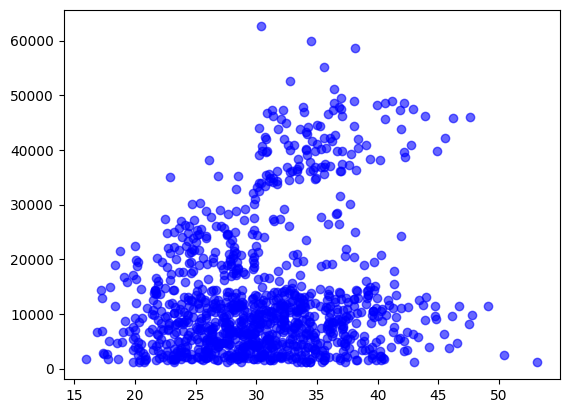

In [79]:
plt.scatter(treino['bmi'], treino['charges'], color = 'blue',alpha =0.6)

- vemos inúmeros outliers no dados.

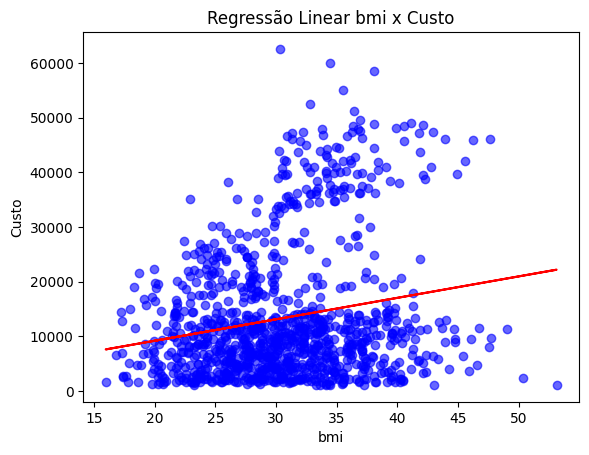

In [80]:
plt.scatter(treino['bmi'], treino['charges'], color = 'blue',alpha =0.6)
plt.plot(treino['bmi'], regressao.predict(treino), color = 'red') # plota a rede de regressao linear apartir dos dados previsto
plt.title('Regressão Linear bmi x Custo')
plt.xlabel('bmi')
plt.ylabel('Custo')
plt.show()

-  vemos que o gráfico tambem não ficou tão legal, indicando que os dados de bmi não são tão representativos para o custo.

**CONCLUSÃO:** Com base no gráfico e no valor de R² = 0,039, conclui-se que o IMC (bmi) tem pouca capacidade de explicar a variação no custo. Apesar de haver uma tendência positiva, o modelo linear não é representativo para prever custos apenas com o IMC.

## 2.2 Análise bmi + variável de fumante

-------------------

In [84]:

regressao = smf.ols(formula='charges ~ bmi + smoker', data=treino).fit() # regressao com dados de bmi e se é fumante ou nao
# v2 variaveis independente e 1 independente
print(regressao.summary())
previsao = regressao.predict(teste)

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     984.3
Date:                Mon, 29 Sep 2025   Prob (F-statistic):          5.63e-243
Time:                        14:06:02   Log-Likelihood:                -11010.
No. Observations:                1070   AIC:                         2.203e+04
Df Residuals:                    1067   BIC:                         2.204e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3582.6389   1130.360     -3.169      0.0

- Vemos que com o BMI e a variável de fumante, o modelo linear chegou a 64.9% de R²,
indicando que 64.9% da **variação nos custos** é explicada pelo BMI (IMC) e pelo
status de fumante, diferente de quando usamos somente o IMC, que resultou em um
R² de apenas 3.9%.

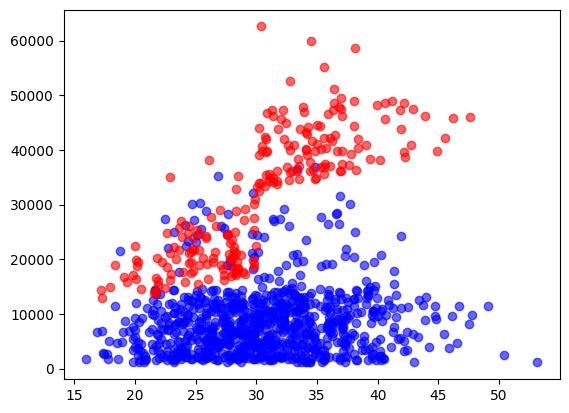

In [97]:
import matplotlib.pyplot as plt
import numpy as np

# não fumantes
nao_fumantes = treino[treino['smoker'] == 0]
plt.scatter(nao_fumantes['bmi'], nao_fumantes['charges'], color='blue', alpha=0.6, label='Não Fumante')
# fumantes
fumantes = treino[treino['smoker'] == 1]
plt.scatter(fumantes['bmi'], fumantes['charges'], color='red', alpha=0.6, label='Fumante')
# separa os fumante e não fumante no grafico, fumanete de vermelho e não fumante de azul

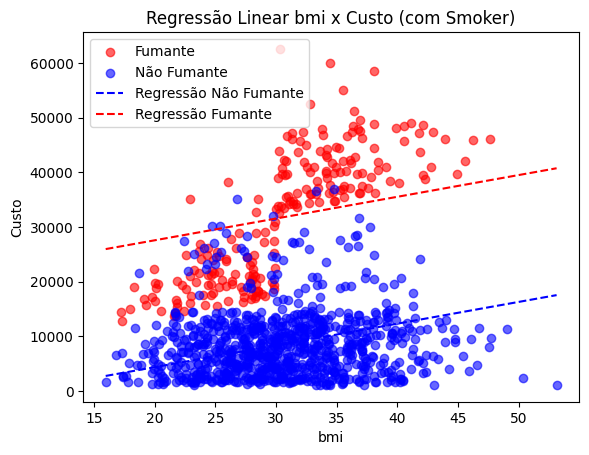

In [100]:
bmi_range = np.linspace(treino['bmi'].min(), treino['bmi'].max(), 100)
# cria espaçamento entre minimo e masso dos dados de bmi
nao_fumante = pd.DataFrame({'bmi': bmi_range, 'smoker': 0}) #datafranme criado copm os dados de não fumante e o range de bmi
fumante = pd.DataFrame({'bmi': bmi_range, 'smoker': 1}) # dataframe criado com os dados de fumantes e o range do bmi

# prevendo os dados apartir da regressao treinada acima para fumantes e nao fumantes
previsao_nao_fumantes = regressao.predict(nao_fumante)
previsao_fumantes = regressao.predict(fumante)

plt.scatter(fumantes['bmi'], fumantes['charges'], color='red', alpha=0.6, label='Fumante') # dados de treino do fumantes e bmi
plt.scatter(nao_fumantes['bmi'], nao_fumantes['charges'], color='blue', alpha=0.6, label='Não Fumante') # dados de treino dos não fumantes e bmi
plt.plot(bmi_range, previsao_nao_fumantes, color='blue', linestyle='--', label='Regressão Não Fumante') # Reta da previsao de nao fumantes
plt.plot(bmi_range, previsao_fumantes, color='red', linestyle='--', label='Regressão Fumante') #reta de previsao para fumantes


plt.title('Regressão Linear bmi x Custo (com Smoker)')
plt.xlabel('bmi')
plt.ylabel('Custo')
plt.legend()
plt.show()

- Vemos um modelo mais explicativo e tambem a Gigantes diferença entre fumantes não fumantes, onde os fumantes tem gasto Muito superiores aos dos não fumantes em relação ao bmi.

## 2.3. Análise via Regressão Linear com todas as variáveis

------------

In [108]:

regressao_completa = smf.ols(formula='charges ~ age + sex + bmi + children + smoker + region', data=treino).fit()
# regressão linear completa com todas as variaveis independentes do dataset
print(regressao_completa.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     508.7
Date:                Mon, 29 Sep 2025   Prob (F-statistic):          2.71e-308
Time:                        14:29:59   Log-Likelihood:                -10845.
No. Observations:                1070   AIC:                         2.170e+04
Df Residuals:                    1063   BIC:                         2.174e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.276e+04   1155.666    -11.042      0.0

- vemos que todas as variáveis juntas apresentam um r^2 de 0.74 indicando que 74% das variações de custo são explicadas pelas variaveis dependentes

In [109]:
regressao_completa.params #veremos a intercepção e o coeficiente para cada tipo de variavel.

,0
Intercept,-12760.459365
age,257.056264
sex,-18.791457
bmi,335.781491
children,425.091456
smoker,23647.818096
region,271.284266


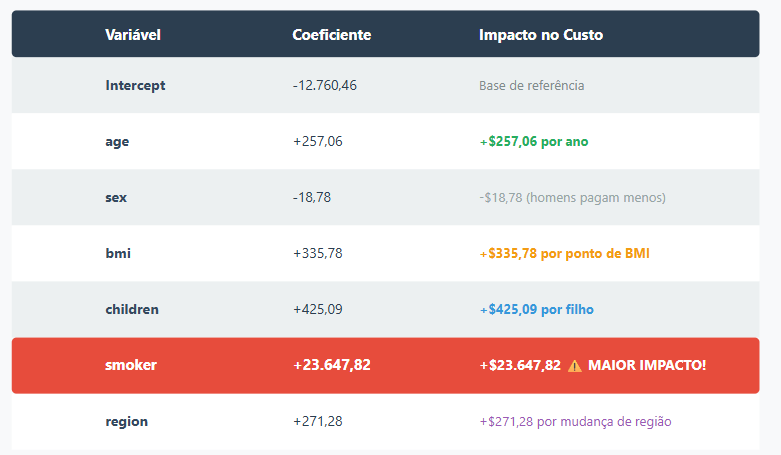

- Ser fumante aumenta em quase **24 mil dólares** os custos de seguro de saúde
segundo o nosso modelo. Ou seja, uma pessoa que não fuma tende a pagar 24 mil
dólares a menos do que alguém que fuma.

- Achando os resíduos da regressão.

Analisar os resíduos é fundamental porque permite verificar se as suposições do modelo de regressão linear são válidas. Se as suposições não forem atendidas, as conclusões que você tira do seu modelo (como a importância das variáveis ou a própria previsão de custo) podem não ser confiáveis.

- o que buscar: Um formato que se assemelhe a um "sino" (uma distribuição normal).

- Sinais de problema: Uma forte assimetria para um dos lados ou a presença de múltiplos picos.

Text(0, 0.5, 'Frequência')

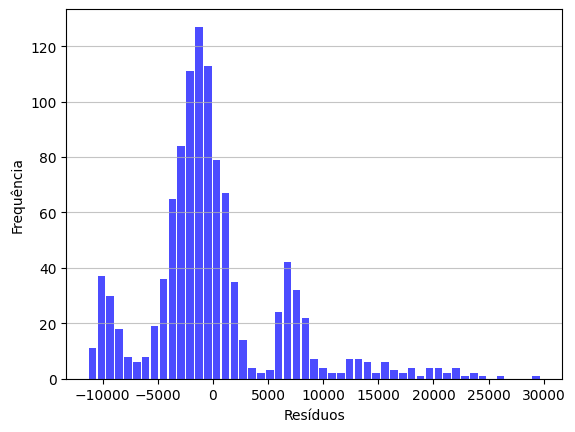

In [118]:
valores_previstos = regressao_completa.predict(treino)
valores_reais = treino['charges'] #valores reais de custo

residuos = valores_reais - valores_previstos

plt.hist(residuos, bins='auto', color='blue', alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Resíduos')
plt.ylabel('Frequência')

- A distribuição dos resíduos assemelha um pouco a uma distribuição normal

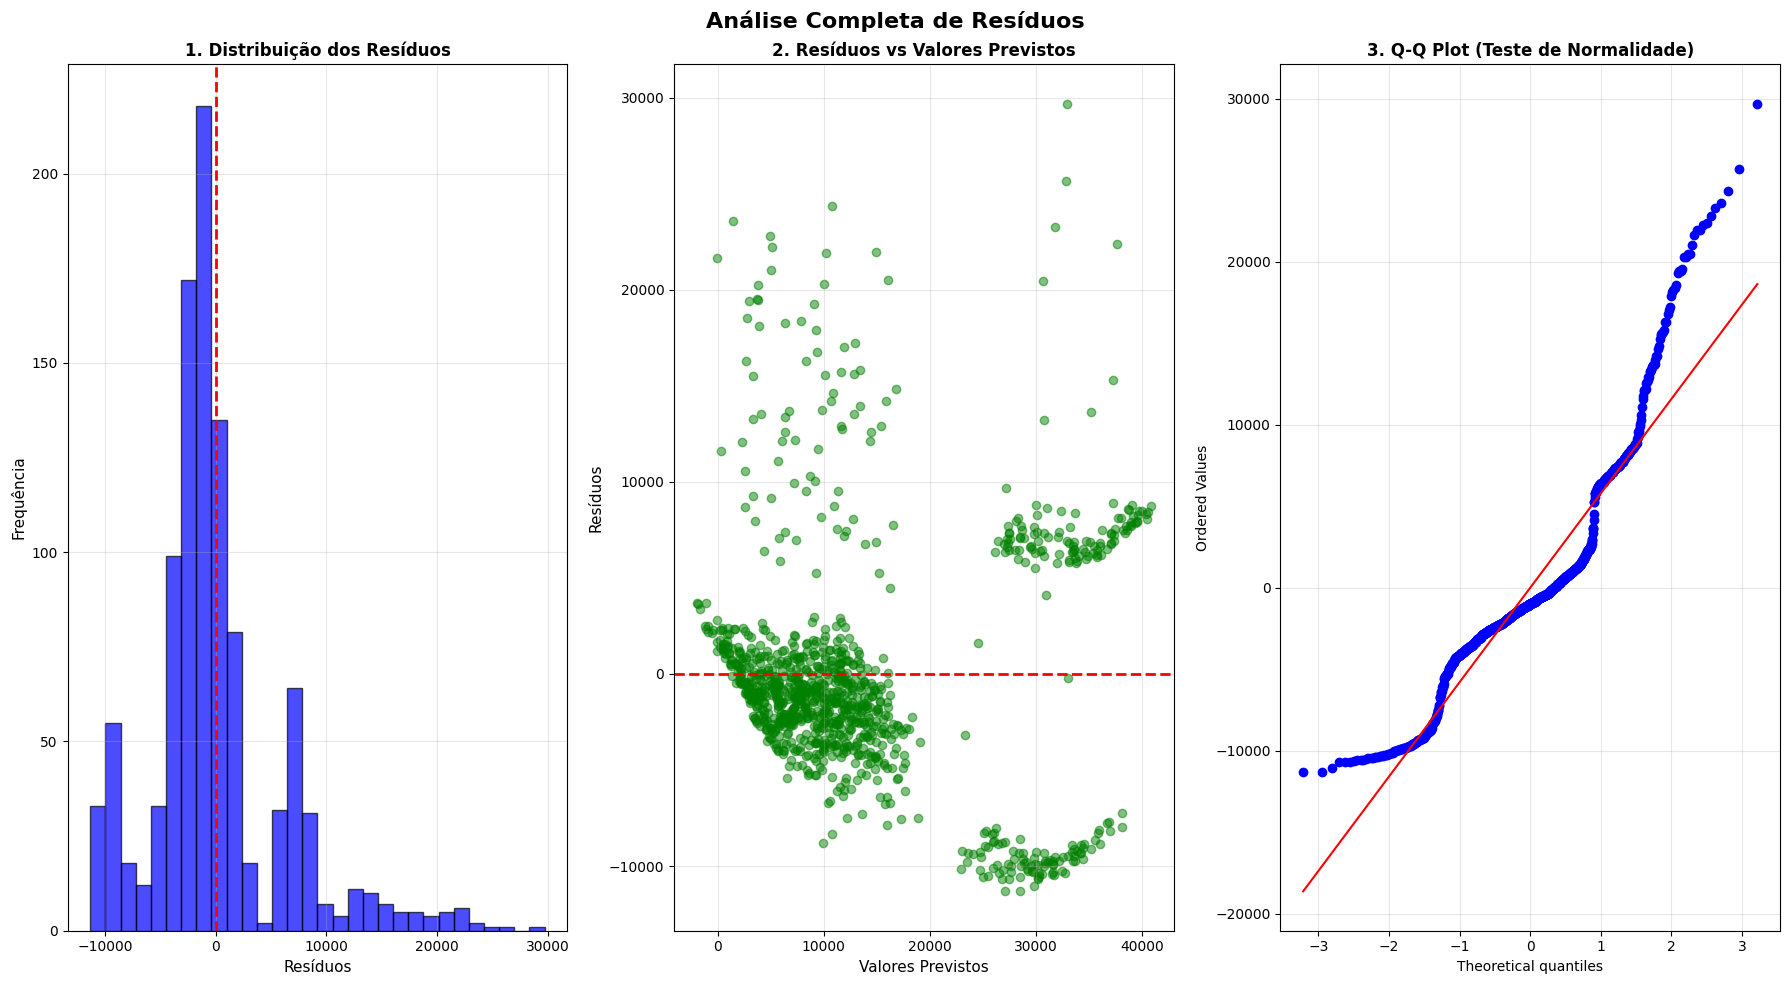

In [127]:
from scipy import stats

#Calcular resíduos
valores_previstos = regressao_completa.predict(treino) # valores previsto sendo o previsto pelo modelos com todas as independentes
valores_reais = treino['charges'] #valores reais sendo os de treino
residuos = valores_reais - valores_previstos

# Criar figura com múltiplos gráficos
fig, axes = plt.subplots(1, 3, figsize=(18, 10))
fig.suptitle('Análise Completa de Resíduos', fontsize=16, fontweight='bold')

# 1. Histograma dos Resíduos
axes[0].hist(residuos, bins=30, color='blue', alpha=0.7, edgecolor='black')
axes[0].axvline(x=0, color='red', linestyle='--', linewidth=2)
axes[0].set_xlabel('Resíduos', fontsize=11)
axes[0].set_ylabel('Frequência', fontsize=11)
axes[0].set_title('1. Distribuição dos Resíduos', fontweight='bold')
axes[0].grid(True, alpha=0.3)

# 2. Resíduos vs Valores Previstos
axes[1].scatter(valores_previstos, residuos, alpha=0.5, color='green')
axes[1].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[1].set_xlabel('Valores Previstos', fontsize=11)
axes[1].set_ylabel('Resíduos', fontsize=11)
axes[1].set_title('2. Resíduos vs Valores Previstos', fontweight='bold')
axes[1].grid(True, alpha=0.3)

# 3. Q-Q Plot (Normalidade)
stats.probplot(residuos, dist="norm", plot=axes[ 2])
axes[2].set_title('3. Q-Q Plot (Teste de Normalidade)', fontweight='bold')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

- Com base nos gráficos, os resíduos do seu modelo indicam que as suposições da regressão linear foram violadas, pois os erros não são aleatórios nem seguem uma distribuição normal. A formação de grupos distintos e a assimetria na distribuição mostram que o modelo falha em capturar dinâmicas importantes, como a diferença entre fumantes e não fumantes. Isso resulta em um modelo estatisticamente não confiável, exigindo uma nova abordagem, como a transformação dos dados ou o uso de um modelo diferente.